In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier,BaggingClassifier

In [3]:
df = pd.read_csv('air_pollution.csv')

C:\Users\PRAMOD\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [6]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


In [7]:
df.shape

(435742, 13)

In [8]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [9]:
df.isnull().sum()*100/len(df)

stn_code                       33.064749
sampling_date                   0.000688
state                           0.000000
location                        0.000688
agency                         34.304933
type                            1.237659
so2                             7.951035
no2                             3.725370
rspm                            9.230692
spm                            54.478797
location_monitoring_station     6.309009
pm2_5                          97.862497
date                            0.001606
dtype: float64

### pm2_5 has 97.8 percent null values. Hence we can drop this column.

In [10]:
df.drop('pm2_5',axis=1,inplace=True)

In [11]:
df.stn_code.nunique()

803

In [12]:
df[df.stn_code=='SAMP'].shape

(1187, 12)

In [13]:
df.stn_code.mode()

0    193
dtype: object

In [14]:
df[df.stn_code==193].head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,date
26458,193,January - M011991,Assam,Guwahati,ASPB,NaN,14.0,22.6,NaN,43.0,NaN,01-01-1991
26461,193,February - M021991,Assam,Guwahati,ASPB,NaN,52.1,10.6,NaN,46.0,NaN,01-02-1991
26472,193,August - M081991,Assam,Guwahati,ASPB,NaN,6.3,2.0,NaN,5.0,NaN,01-08-1991
26473,193,September - M091991,Assam,Guwahati,ASPB,NaN,6.1,23.5,NaN,9.0,NaN,01-09-1991
26475,193,October - M101991,Assam,Guwahati,ASPB,NaN,6.2,22.9,NaN,10.0,NaN,01-10-1991


In [15]:
import numpy as np

In [16]:
df.stn_code.replace('SAMP',193,inplace=True) # Replacing SAMP with 193 i.e mode

In [17]:
df.stn_code.fillna(193,inplace=True)

In [18]:
df['stn_code']=df.stn_code.astype('int')

In [19]:
df.isnull().sum()

stn_code                            0
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
date                                7
dtype: int64

In [20]:
df.type.unique()

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [21]:
df.type.replace(['Industrial Area','Industrial'],'Industrial Areas',inplace=True)

In [22]:
df.type.replace(['Sensitive Area','Sensitive'],'Sensitive Areas',inplace=True)

In [23]:
df.type.mode()

0    Residential, Rural and other Areas
dtype: object

In [24]:
df.type.fillna('Residential, Rural and other Areas',inplace=True)

In [25]:
df.type.unique()

array(['Residential, Rural and other Areas', 'Industrial Areas',
       'Sensitive Areas', 'Residential and others', 'Residential',
       'RIRUO'], dtype=object)

In [26]:
df.so2.mean()

10.829414322671498

In [27]:
df.so2.fillna(10.829414322671498,inplace=True)

In [28]:
df.no2.mean()

25.80962289781295

In [29]:
df.no2.fillna(25.80962289781295,inplace=True)

In [30]:
df.rspm.mean()

108.83278418538401

In [31]:
df.rspm.fillna(108.83278418538401,inplace=True)

In [32]:
df.spm.mean()

220.78347959832885

In [33]:
df.spm.fillna(220.78347959832885,inplace=True)

In [34]:
df.date.iloc[435712]

'29-09-2015'

In [35]:
df.sampling_date.iloc[435712]

'29-09-2015'

In [36]:
df.date.iloc[100]

'01-04-1992'

In [37]:
df.sampling_date.iloc[100]

'April - M041992'

#### It seems sampling date and date are identical

#### dropping sampling date

In [38]:
df.drop('sampling_date',axis=1,inplace=True)

In [39]:
df.date.mode()

0    19-03-2015
dtype: object

In [40]:
df.date.fillna('19-03-2015',inplace= True)

In [41]:
df.describe()

,stn_code,so2,no2,rspm,spm
count,435742.000000,435742.000000,435742.000000,435742.000000,435742.00000
mean,324.477009,10.829414,25.809623,108.832784,220.78348
std,325.637907,10.723633,18.155160,71.333148,102.14547
min,1.000000,0.000000,0.000000,0.000000,0.00000
25%,193.000000,5.000000,14.000000,59.000000,203.00000
50%,212.000000,9.000000,22.300000,97.666667,220.78348
75%,473.000000,13.000000,32.000000,135.000000,220.78348
max,30004.000000,909.000000,876.000000,6307.033333,3380.00000


In [42]:
df.location.fillna('Others',inplace=True)

In [43]:
df.state.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

#### State and agency convey same information. Hence we can drop agency.

In [44]:
df.drop('agency',axis=1,inplace=True)

In [45]:
df['date'] = pd.to_datetime(df.date, format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 10 columns):
stn_code                       435742 non-null int32
state                          435742 non-null object
location                       435742 non-null object
type                           435742 non-null object
so2                            435742 non-null float64
no2                            435742 non-null float64
rspm                           435742 non-null float64
spm                            435742 non-null float64
location_monitoring_station    408251 non-null object
date                           435742 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int32(1), object(4)
memory usage: 31.6+ MB


In [46]:
df.head()

,stn_code,state,location,type,so2,no2,rspm,spm,location_monitoring_station,date
0,150,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,NaN,1990-02-01
1,151,Andhra Pradesh,Hyderabad,Industrial Areas,3.1,7.0,108.832784,220.78348,NaN,1990-02-01
2,152,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,NaN,1990-02-01
3,150,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,NaN,1990-03-01
4,151,Andhra Pradesh,Hyderabad,Industrial Areas,4.7,7.5,108.832784,220.78348,NaN,1990-03-01


#### location_monitoring_station has too many null values and it does not convey significant information in predicting the type of area. Hence it can be dropped.

In [47]:
df.drop('location_monitoring_station',axis=1,inplace=True)

In [48]:
df.head()

,stn_code,state,location,type,so2,no2,rspm,spm,date
0,150,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,1990-02-01
1,151,Andhra Pradesh,Hyderabad,Industrial Areas,3.1,7.0,108.832784,220.78348,1990-02-01
2,152,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,1990-02-01
3,150,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,1990-03-01
4,151,Andhra Pradesh,Hyderabad,Industrial Areas,4.7,7.5,108.832784,220.78348,1990-03-01


### Univariate Analysis

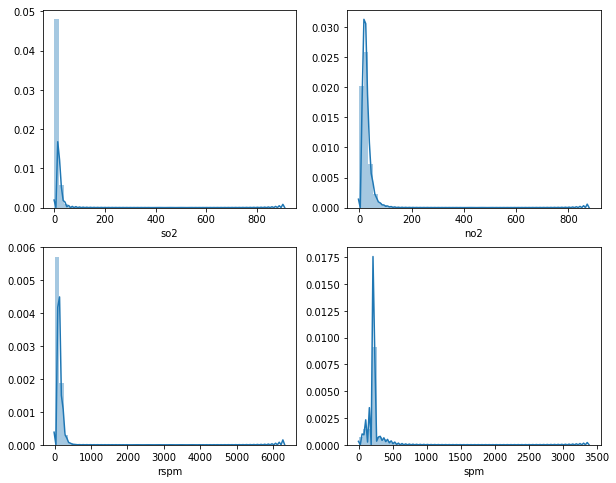

In [49]:
plt.figure(figsize=[10,8])
plt.subplot(221)
sns.distplot(df.so2)
plt.subplot(222)
sns.distplot(df.no2)
plt.subplot(223)
sns.distplot(df.rspm)
plt.subplot(224)
sns.distplot(df.spm)
plt.show()

### Bivariate Analysis

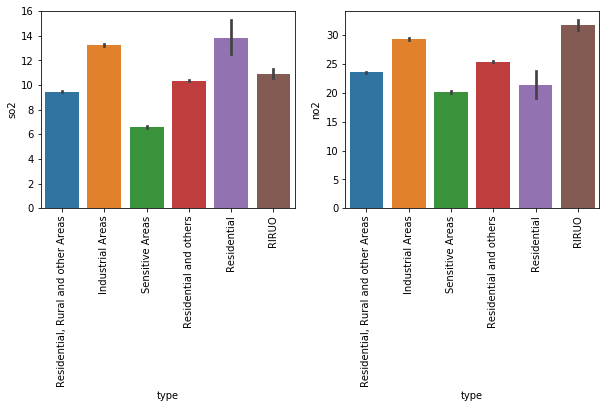

In [50]:
plt.figure(figsize=[10,8])
plt.subplot(221)
sns.barplot(df.type,df.so2)
plt.xticks(rotation=90)

plt.subplot(222)
sns.barplot(df.type,df.no2)
plt.xticks(rotation=90)


plt.show()

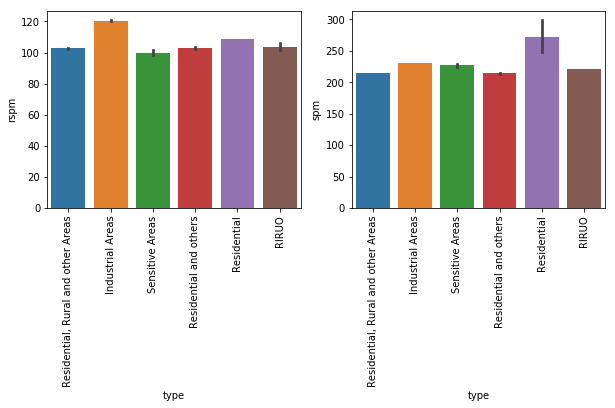

In [51]:
plt.figure(figsize=[10,8])
plt.subplot(223)
sns.barplot(df.type,df.rspm)
plt.xticks(rotation=90)

plt.subplot(224)
sns.barplot(df.type,df.spm)
plt.xticks(rotation=90)

plt.show()

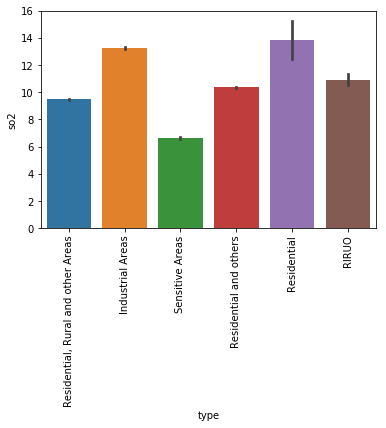

In [52]:
sns.barplot(df.type,df.so2)
plt.xticks(rotation=90)
plt.show()

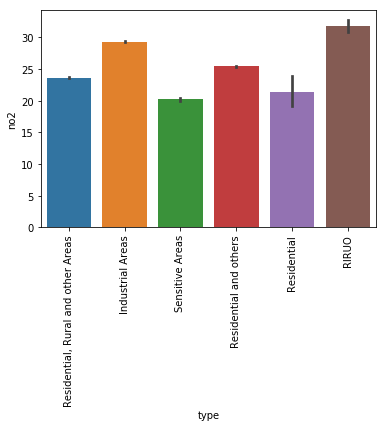

In [53]:
sns.barplot(df.type,df.no2)
plt.xticks(rotation=90)
plt.show()

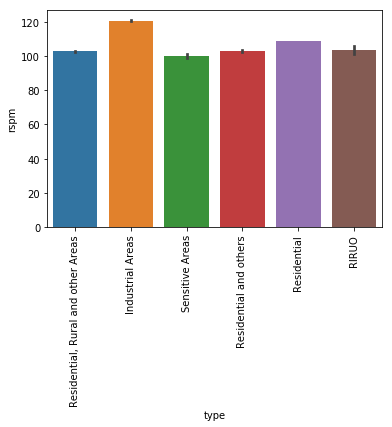

In [54]:
sns.barplot(df.type,df.rspm)
plt.xticks(rotation=90)
plt.show()

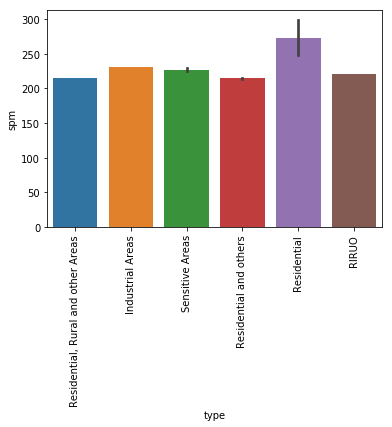

In [55]:
sns.barplot(df.type,df.spm)
plt.xticks(rotation=90)
plt.show()

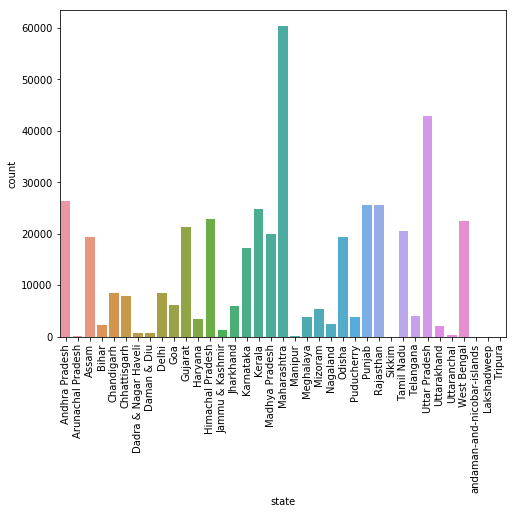

In [56]:
plt.figure(figsize=[8,6])
sns.countplot(df.state)
plt.xticks(rotation=90)
plt.show()

In [57]:
df.columns

Index(['stn_code', 'state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm',
       'date'],
      dtype='object')

In [58]:
df2 = df.drop(['stn_code', 'state', 'location','date'],axis=1)

In [59]:
df2.head()

,type,so2,no2,rspm,spm
0,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348
1,Industrial Areas,3.1,7.0,108.832784,220.78348
2,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348
3,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348
4,Industrial Areas,4.7,7.5,108.832784,220.78348


In [60]:
X=df2.drop('type',axis=1)
y=df2.type

### Standard scaler

In [61]:
sc=StandardScaler()

In [62]:
X_scaled = sc.fit_transform(X)

In [63]:
X_scaled.mean()   ## Mean = 0 and std dev = 1

-1.0758214033022434e-16

In [64]:
X_scaled.std()

0.9999999999999998

### Train test split

In [65]:
X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

### Model Building

In [66]:
knn = KNeighborsClassifier()
y_pred = knn.fit(X_train_scaled,y_train).predict(X_test_scaled)

In [67]:
accuracy_score(y_test,y_pred)

0.5902863306380668

In [79]:
dtree = DecisionTreeClassifier(max_depth = 5)
y_pred = dtree.fit(X_train_scaled,y_train).predict(X_test_scaled)

In [80]:
accuracy_score(y_test,y_pred)

0.574642564812619

In [71]:
from sklearn import tree

In [82]:
rf = RandomForestClassifier()
y_pred = rf.fit(X_train_scaled,y_train).predict(X_test_scaled)

C:\Users\PRAMOD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [83]:
accuracy_score(y_test,y_pred)

0.6058000504884374

In [104]:
y_pred

array(['Residential and others', 'Residential, Rural and other Areas',
       'Industrial Areas', ..., 'Residential and others',
       'Industrial Areas', 'Industrial Areas'], dtype=object)

In [84]:
from sklearn.metrics import confusion_matrix

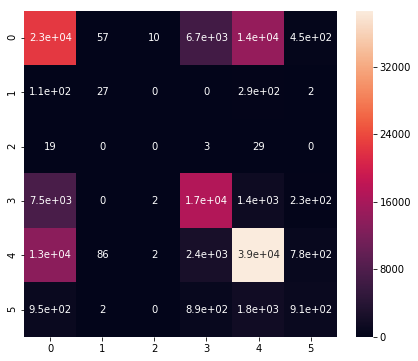

In [99]:
plt.figure(figsize=[7,6])
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


### Voting Classifier


In [221]:

vc = VotingClassifier(estimators=[('Tree',dtree),('KNN',knn),('rf',rf)])

y_pred = vc.fit(X_train_scaled,y_train).predict(X_test_scaled)

accuracy_score(y_test,y_pred)

0.6045990376597844

### BaggingClassifier

In [222]:
bagg = BaggingClassifier(base_estimator=knn)

y_pred = bagg.fit(X_train_scaled,y_train).predict(X_test_scaled)

accuracy_score(y_test,y_pred)

0.5974465090305455

## WITH STATE _ One hot encoding

In [309]:
df2 = df.drop(['stn_code', 'location','date'],axis=1)

In [310]:
X=df2.drop('type',axis=1)
y=df2.type

### One hot Encoding

In [311]:
X_new = pd.get_dummies(X)

### Standard scaler

In [313]:
sc=StandardScaler()

In [314]:
X_scaled = pd.DataFrame(sc.fit_transform(X_new),columns=X_new.columns)

C:\Users\PRAMOD\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PRAMOD\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [323]:
X_scaled.head()

,so2,no2,rspm,spm,state_Andhra Pradesh,state_Arunachal Pradesh,state_Assam,state_Bihar,state_Chandigarh,state_Chhattisgarh,...,state_Rajasthan,state_Sikkim,state_Tamil Nadu,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_Uttaranchal,state_West Bengal,state_andaman-and-nicobar-islands
0,-0.562255,-0.463209,-9.960917e-16,5.564954e-16,3.94023,-0.014373,-0.215635,-0.072446,-0.141219,-0.135279,...,-0.249778,-0.001515,-0.222742,-0.095986,-0.001515,-0.330102,-0.067236,-0.025583,-0.233138,-0.001515
1,-0.720784,-1.036049,-9.960917e-16,5.564954e-16,3.94023,-0.014373,-0.215635,-0.072446,-0.141219,-0.135279,...,-0.249778,-0.001515,-0.222742,-0.095986,-0.001515,-0.330102,-0.067236,-0.025583,-0.233138,-0.001515
2,-0.431703,0.148188,-9.960917e-16,5.564954e-16,3.94023,-0.014373,-0.215635,-0.072446,-0.141219,-0.135279,...,-0.249778,-0.001515,-0.222742,-0.095986,-0.001515,-0.330102,-0.067236,-0.025583,-0.233138,-0.001515
3,-0.422377,-0.611927,-9.960917e-16,5.564954e-16,3.94023,-0.014373,-0.215635,-0.072446,-0.141219,-0.135279,...,-0.249778,-0.001515,-0.222742,-0.095986,-0.001515,-0.330102,-0.067236,-0.025583,-0.233138,-0.001515
4,-0.571581,-1.008509,-9.960917e-16,5.564954e-16,3.94023,-0.014373,-0.215635,-0.072446,-0.141219,-0.135279,...,-0.249778,-0.001515,-0.222742,-0.095986,-0.001515,-0.330102,-0.067236,-0.025583,-0.233138,-0.001515


### Train test split

In [324]:
X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=100)

### Model Building

In [325]:
knn = KNeighborsClassifier()
y_pred = knn.fit(X_train_scaled,y_train).predict(X_test_scaled)

In [326]:
accuracy_score(y_test,y_pred)

0.6763232177964092